# Analysis of Factors Influencing the Success of Video Games

## Project Description and Research Objectives

This research is intended for the online store "Streamchik," which sells computer games worldwide. The objective is to determine which video games the store should focus on (which games can be the most popular) and how to plan advertising campaigns. To achieve this, we will identify patterns that determine the success of games.

The data for the research is taken from open sources and includes historical data on game sales, user and expert ratings, genres, and platforms (such as Xbox or PlayStation). The data is up-to-date as of the year 2016.

Data Description:

- Name - the name of the game
- Platform - the platform
- Year_of_Release - the year of release
- Genre - the genre of the game
- NA_sales - sales in North America (millions of copies sold)
- EU_sales - sales in Europe (millions of copies sold)
- JP_sales - sales in Japan (millions of copies sold)
- Other_sales - sales in other countries (millions of copies sold)
- Critic_Score - critic score (maximum of 100)
- User_Score - user score (maximum of 10)
- Rating - rating from the Entertainment Software Rating Board (ESRB). This association determines the rating of computer games and assigns them an appropriate age category.

## Data preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import warnings
warnings.simplefilter("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
try:
    df = pd.read_csv("https://code.s3.yandex.net/datasets/games.csv")
except:
    df = pd.read_csv('/datasets/games.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
# converting column names to snake case
df.columns = df.columns.str.lower()

In [7]:
# missing values percentage by column
df.isna().mean().round(4) * 100

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         40.09
rating             40.48
dtype: float64

In [8]:
# checking if there's a correlation between missing values and release year
df[df['critic_score'].isna() | df['rating'].isna() | df['user_score'].isna()]['year_of_release'].value_counts()

2009.0    782
2010.0    759
2008.0    719
2011.0    650
2007.0    505
2015.0    394
2006.0    389
1998.0    354
2012.0    340
2014.0    324
1999.0    302
2005.0    287
2016.0    285
2013.0    277
1997.0    275
1996.0    256
1995.0    219
2000.0    209
2004.0    206
2002.0    202
2003.0    193
2001.0    157
1994.0    120
1993.0     62
1981.0     46
1992.0     42
1991.0     41
1982.0     36
1986.0     21
1983.0     17
1989.0     17
1990.0     16
1987.0     16
1988.0     14
1984.0     14
1985.0     13
1980.0      9
Name: year_of_release, dtype: int64

In [9]:
# checking for full duplicates
df.duplicated().sum()

0

In [10]:
# checking for partial duplicates
df[df.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [11]:
# removing duplicates
df.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first', inplace=True)

In [12]:
# converting year_of_release into int type
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [13]:
# replacing "tbd" in user_score column with NaN
# converting user_score values to float type
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype(float)

In [14]:
# replacing missing values in rating with "unknown"
df['rating'] = df['rating'].fillna('unknown')

In [15]:
# calculating the total sales in all regions and saving the results in a separate column
df['sales_worldwide'] = df['eu_sales'] + df['jp_sales'] + df['na_sales'] + df['other_sales']

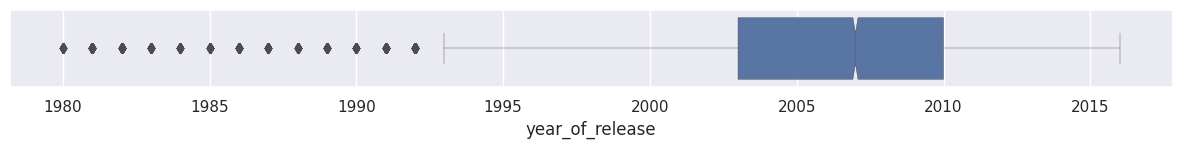

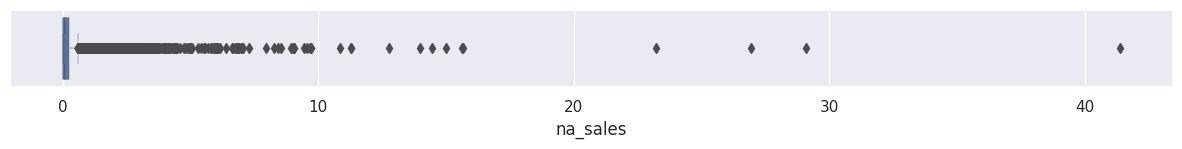

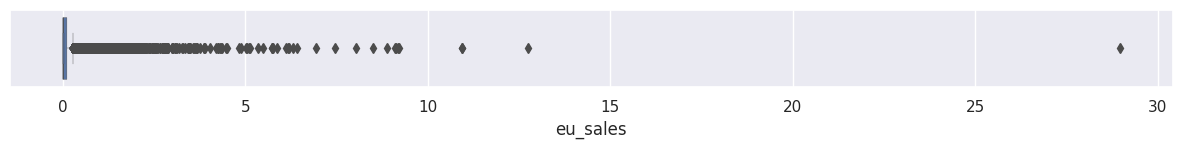

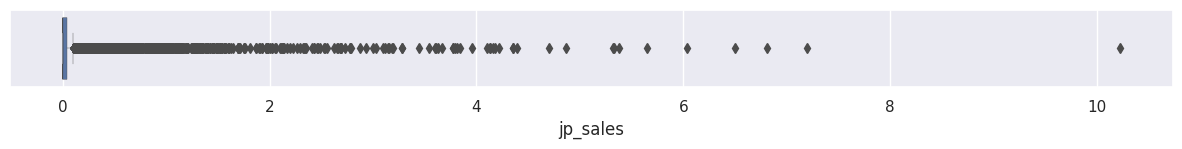

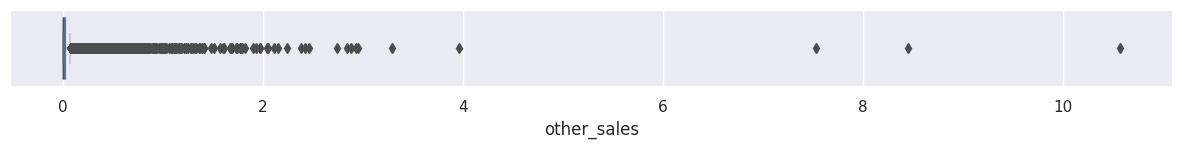

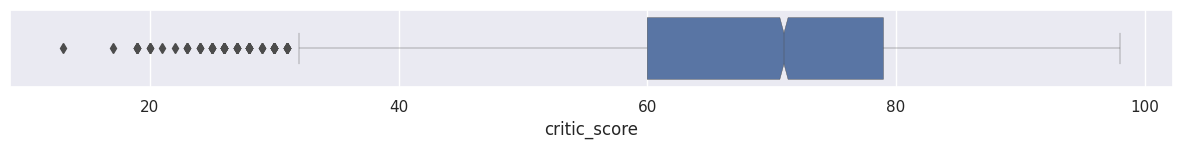

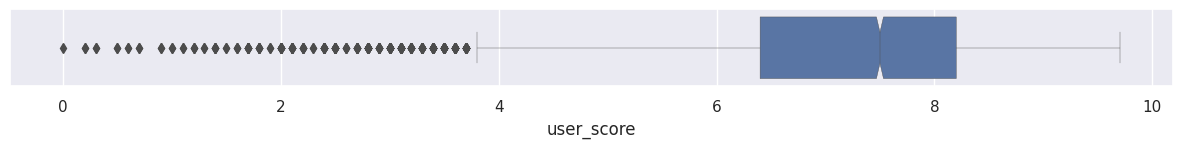

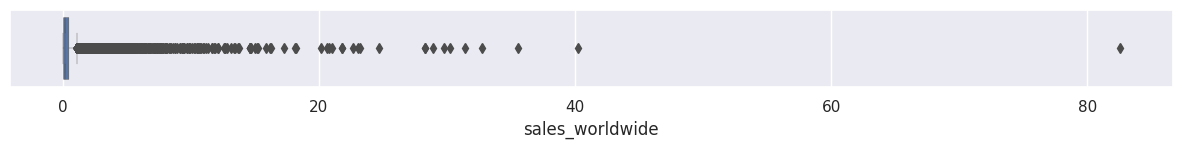

In [16]:
# let's take a look at numeric values distribution
sns.set(style="darkgrid")
num_columns = []

for col in df.columns:
  if col in df.select_dtypes(include=np.number):
    num_columns.append(col)

for col in num_columns:
  plt.figure(figsize=(15,1))
  sns.boxplot(x=df[col].dropna(), linewidth=0.3, notch=True)
  plt.show()

### Conclusions for the section:

- The column "year_of_release" was converted to the int type, and the column "user_score" was converted to the float type to enable calculations with it.
- For the same purpose, the "user_score" values of "tbd" (to be determined) were replaced with NaN.
- Numerous missing values in "user_score," "critic_score," and "rating" columns were left unchanged because, considering the nature of this data, it would be incorrect to fill the gaps with the median or an artificial value.
- The missing values in the "rating" column were replaced with the value "unknown."
- There are missing values for games released in different years. This suggests that the presence of missing values can be explained by the absence of platforms that aggregated scores in the 1980s-1990s and the fact that games released in the year of the report (2016) might not have had enough ratings yet.

## EDA

In [17]:
# barplot function
def barplot(column_to_group, func, title, xl, yl, y='name'):
  if func == 'count':
    df.groupby(column_to_group)[y].count().plot(kind='bar', y=y, figsize=(15, 7), title=title, xlabel=xl, ylabel=yl)
  else:
    df.groupby(column_to_group)[y].sum().sort_values().plot(kind='bar', y=y, figsize=(15, 7), title=title, xlabel=xl, ylabel=yl)

### Number of games released by year

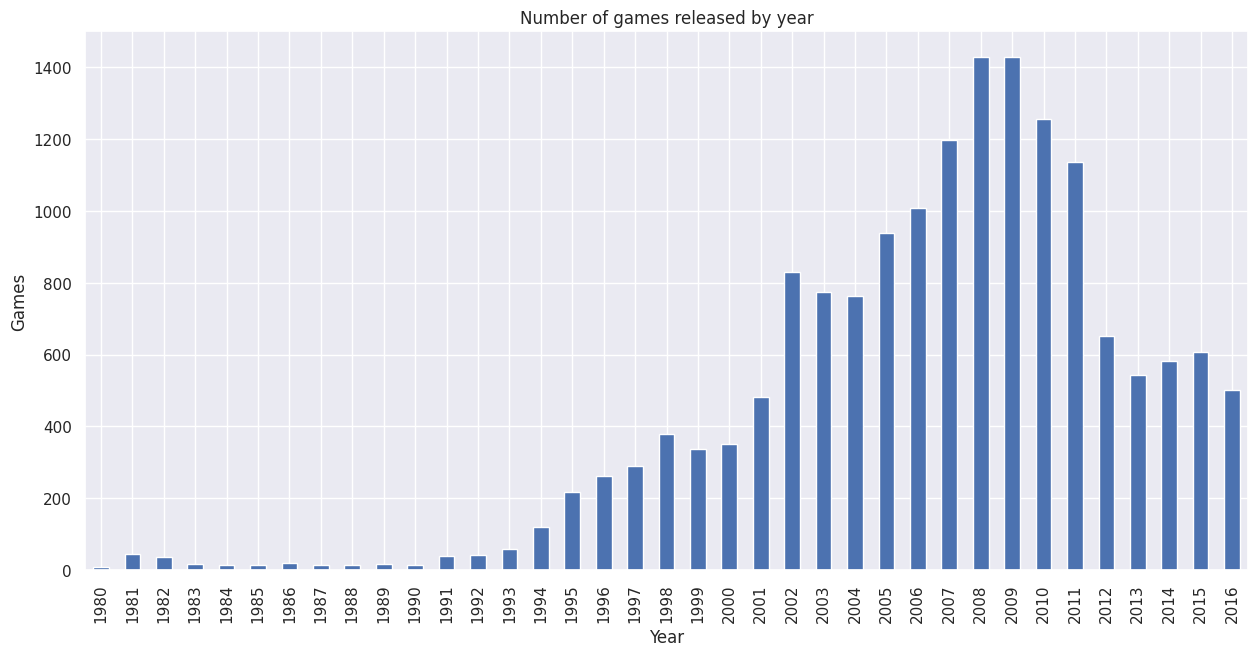

In [18]:
barplot('year_of_release', 'count', 'Number of games released by year', 'Year', 'Games')

In [19]:
# number of unique games released by year
for year in df['year_of_release'].sort_values().unique():
    print(year, len(df[df['year_of_release']==year]['name'].unique()))

1980 9
1981 46
1982 36
1983 17
1984 14
1985 14
1986 21
1987 16
1988 15
1989 17
1990 16
1991 40
1992 41
1993 60
1994 117
1995 215
1996 258
1997 282
1998 364
1999 326
2000 325
2001 428
2002 631
2003 546
2004 550
2005 657
2006 773
2007 884
2008 1039
2009 1001
2010 900
2011 779
2012 446
2013 335
2014 319
2015 362
2016 297
<NA> 0


It can be seen that the number of released games began to grow rapidly in the mid-1990s, which coincides with the widespread adoption of personal computers and the release of the first PlayStation, and reached its peak in 2008-2009. From the beginning of the 2010s, the values started to decline, which can be attributed to the widespread availability of the internet - players started to shift towards online platforms and smartphones.

### Dynamics of sales by platform

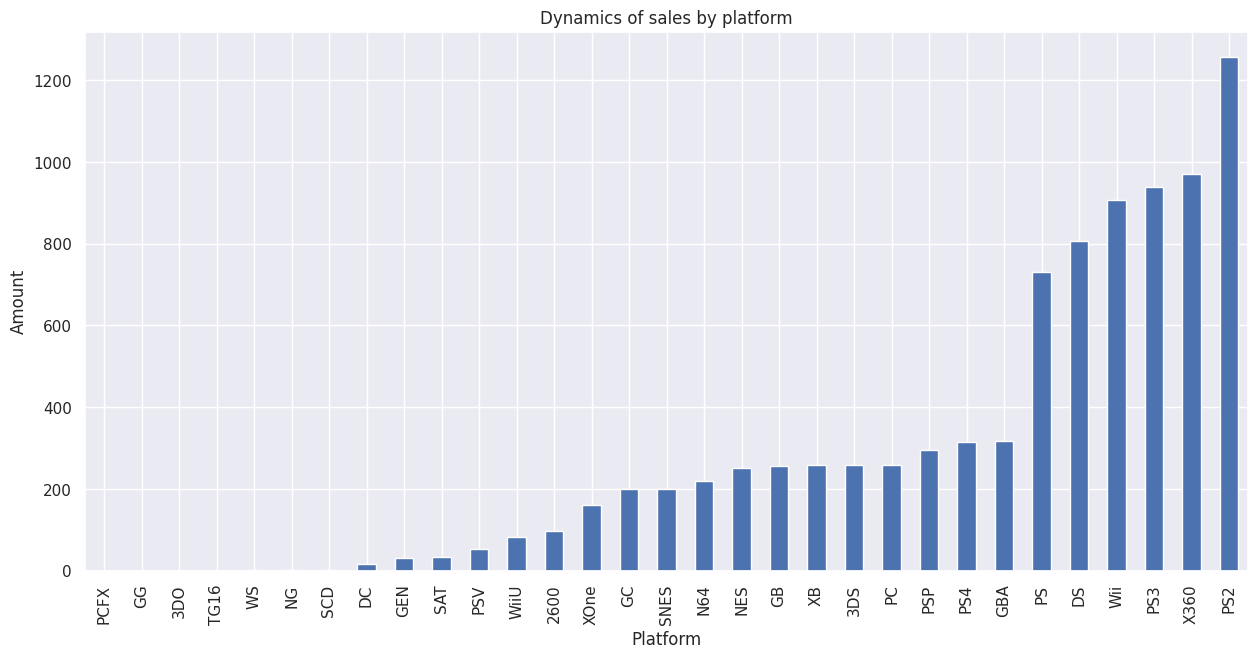

In [20]:
barplot('platform', 'sum', "Dynamics of sales by platform", "Platform", "Amount", 'sales_worldwide')

PlayStation, Nintendo DS, Nintendo Wii, and Xbox 360 are the clear leaders in terms of sales. The highest number of games was sold for PlayStation 2.

### Distribution by year
Let's study platforms with the highest total sales

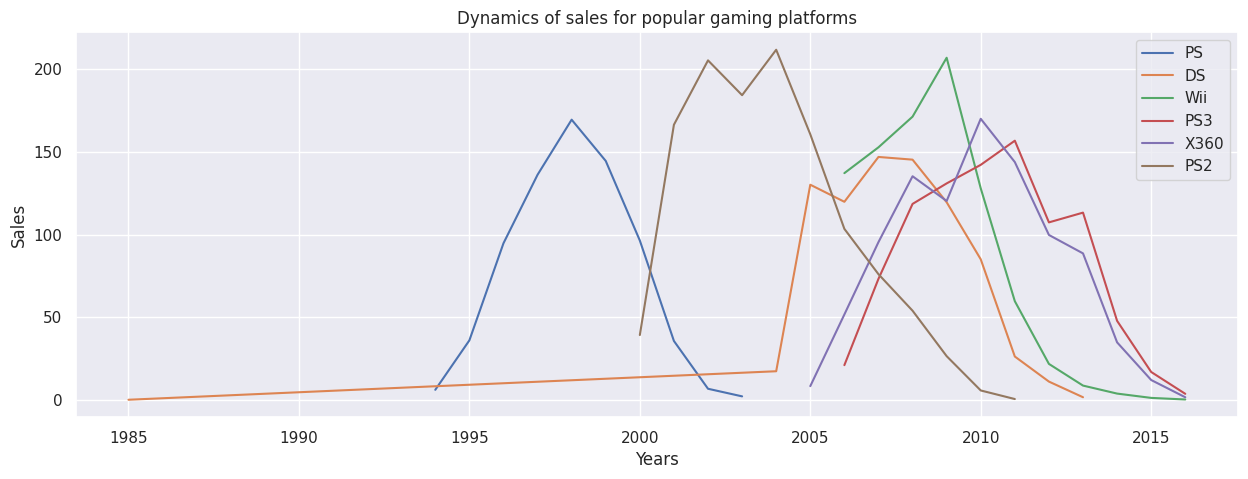

In [21]:
most_popular_platforms = ["PS", "DS", "Wii", "PS3", "X360", "PS2"]

for pl in most_popular_platforms:
  df.query('platform == @pl').groupby('year_of_release')['sales_worldwide'].sum().plot(x="year_of_release", y="sales_worldwide", xlabel='Years', ylabel='Sales', figsize=(15,5), title='Dynamics of sales for popular gaming platforms')
  plt.legend(("PS", "DS", "Wii", "PS3", "X360", "PS2"))

Of the six most popular platforms, only three remained active in 2016: Nintendo Wii, Xbox 360, and PS3. However, their sales also reached a historical minimum.

### The typical period for the emergence of new platforms and the disappearance of old ones

In [22]:
# filtering platforms that were no longer supported by year 2016
df[df['year_of_release']==2016].groupby('platform')['year_of_release'].count()
outdated_platforms = []

for pl in df['platform'].unique():
  if pl not in ["3DS", "PC", "PS3", "PS4", "PSV", "Wii", "WiiU", "X360", "XOne"]:
    outdated_platforms.append(pl)
outdated_platforms

# calculating the support duration from the platform's launch
lifespan = []
for pl in outdated_platforms:
  lifespan.append(df[df['platform']==pl]['year_of_release'].max() - df[df['platform']==pl]['year_of_release'].min())

print(f'Median life expectancy of a platform - {np.median(lifespan)} years.')

Median life expectancy of a platform - 6.5 years.


To make forecasts for the year 2017, we will use data from the last three years: 2014, 2015 and 2016.

In [23]:
# saving relevant records in a separate dataframe
df_latest = df[df['year_of_release']>=2014]

### Which platforms are leading in sales, growing, or declining?
Let's select a few potentially profitable platforms.



In [24]:
data = []

for pl in df_latest['platform'].unique():
    data.append(
        go.Bar(x=df_latest[df_latest.platform==pl].groupby("year_of_release")['sales_worldwide'].sum().index,
               y=df_latest[df_latest.platform==pl].groupby("year_of_release")['sales_worldwide'].sum(),
               name=pl)
    )
layout = {'title': 'Three most recent years sales'}

fig = go.Figure(data=data, layout=layout)
fig.show()

PS4, Xbox One, and 3DS are leading in sales, and they should be considered as potentially the most profitable platforms in the future.

### A box plot of global game sales broken down by platforms

In [25]:
data = []

for pl in df_latest['platform'].unique():
    data.append(
        go.Box(y=df_latest[df_latest.platform==pl]['sales_worldwide'],
               name=pl )
    )

layout = {'title': 'Sales by platform'}
fig = go.Figure(data=data, layout=layout)

fig.update_layout(yaxis=dict(range=[0,1]))

The median value of copies sold for most games does not exceed 0.2 million, except for XOne. Games for PSV and PSP sold the least. For most platforms, there are individual games that sold much better than the rest, for example, PS4 has values of 12 and 15 million copies sold.



### The influence of user and critic ratings on sales
Let's create a scatter plot and calculate the correlation between ratings and sales. We will examine this on the example of platforms with the highest sales: PS4, XOne, and 3DS.


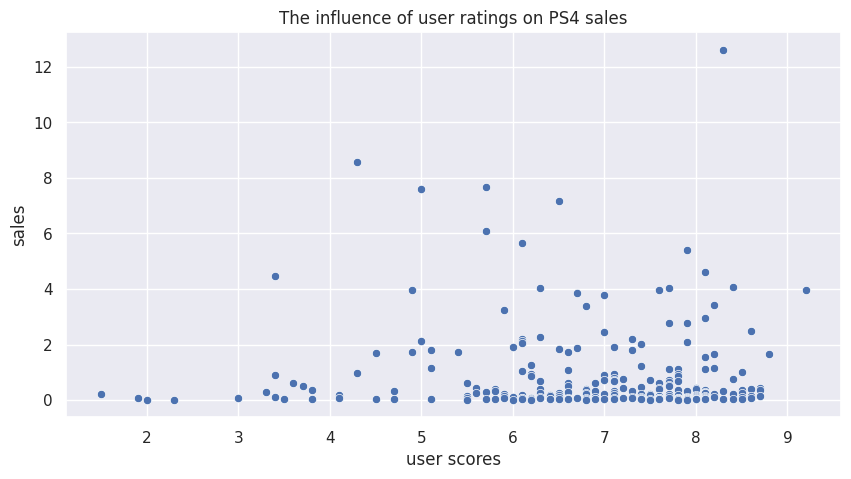

Correlation: -0.04


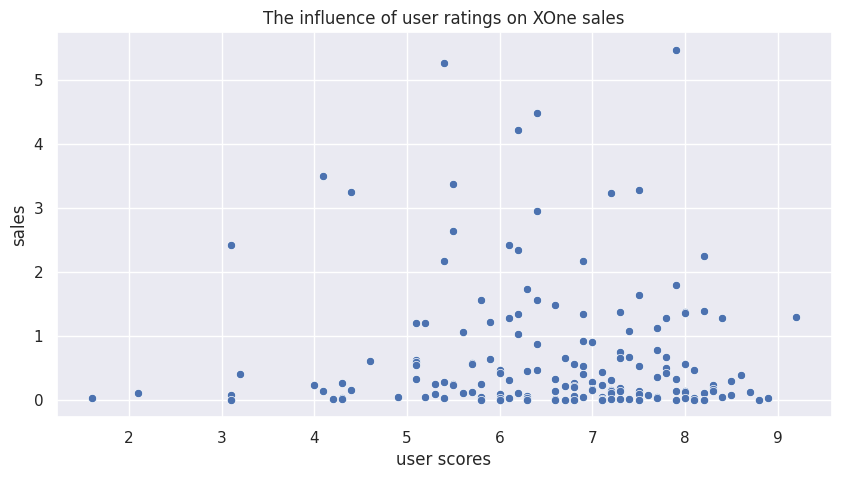

Correlation: -0.07


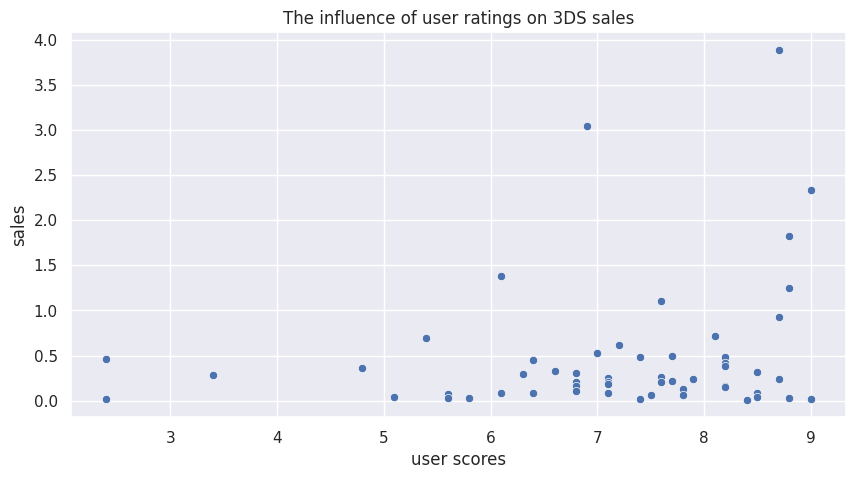

Correlation: 0.22


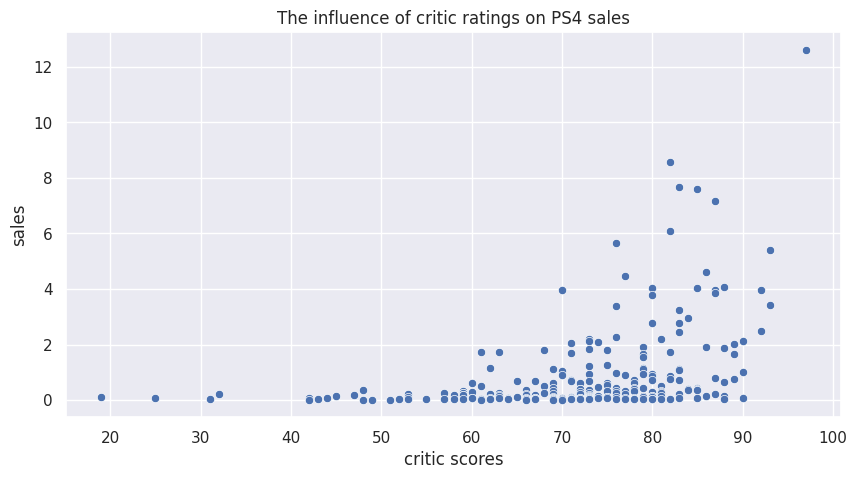

Correlation: 0.4


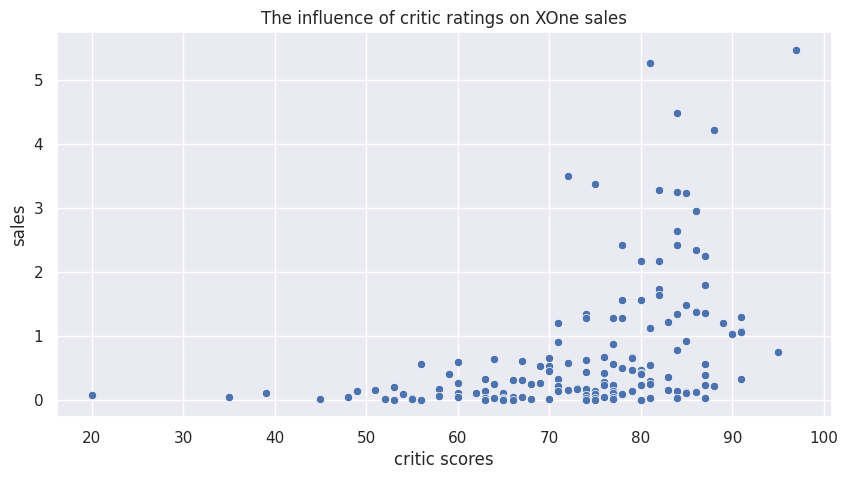

Correlation: 0.43


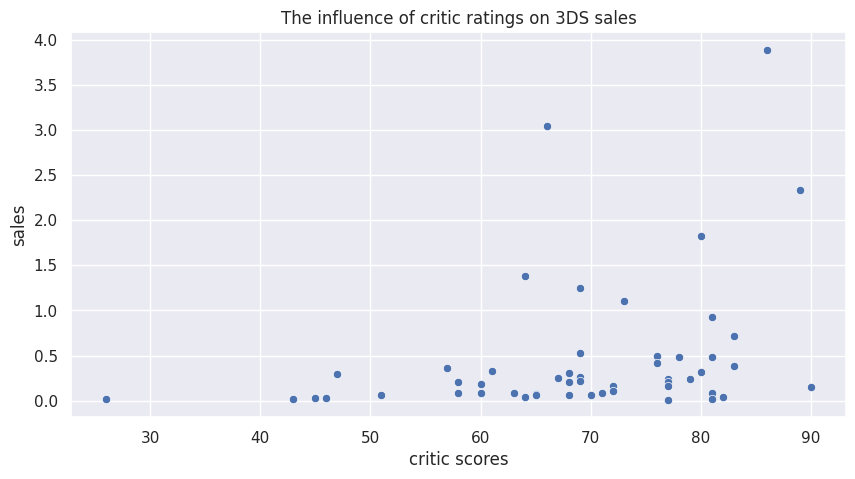

Correlation: 0.31


In [26]:
def scatterplot(x, df, title, xl, yl, y='sales_worldwide'):
  plt.figure(figsize=(10,5))
  sns.scatterplot(x=x, y=y, data=df)
  plt.title(title)
  plt.xlabel(xl)
  plt.ylabel(yl)
  plt.show()
  print(f'Correlation: {(df[x].corr(df[y])).round(2)}')

scatterplot('user_score', df_latest.query('platform=="PS4"'), 'The influence of user ratings on PS4 sales', 'user scores', "sales")
scatterplot('user_score', df_latest.query('platform=="XOne"'), 'The influence of user ratings on XOne sales', 'user scores', "sales")
scatterplot('user_score', df_latest.query('platform=="3DS"'), 'The influence of user ratings on 3DS sales', 'user scores', "sales")

scatterplot('critic_score', df_latest.query('platform=="PS4"'), 'The influence of critic ratings on PS4 sales', 'critic scores', "sales")
scatterplot('critic_score', df_latest.query('platform=="XOne"'), 'The influence of critic ratings on XOne sales', 'critic scores', "sales")
scatterplot('critic_score', df_latest.query('platform=="3DS"'), 'The influence of critic ratings on 3DS sales', 'critic scores', "sales")

It can be concluded that there is no correlation between user scores and sales, but there is a weak correlation between sales and critic scores.

### Overall distribution of games across genres and their profits

<Axes: title={'center': 'Number of games by genre'}, xlabel='genre', ylabel='number of games'>

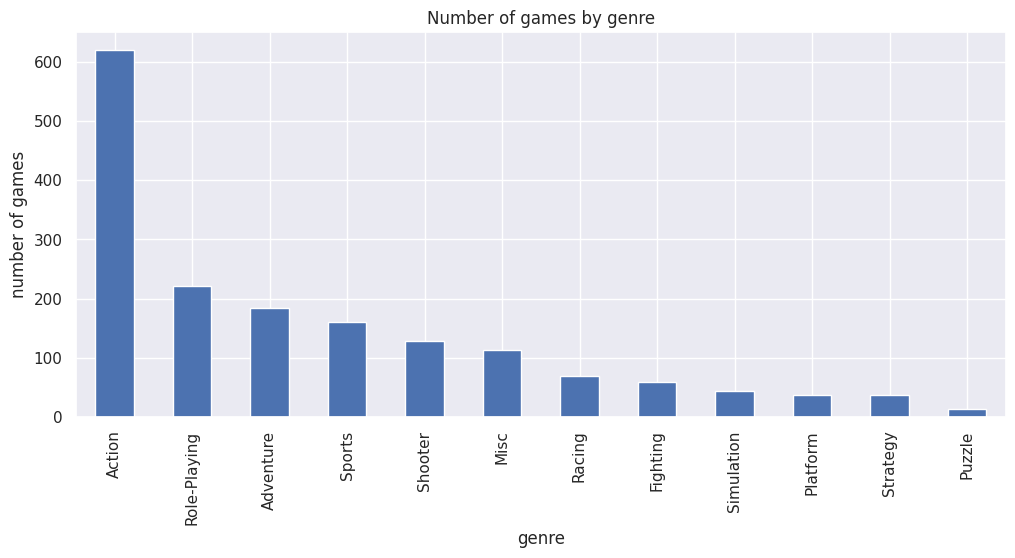

In [36]:
df_latest.groupby('genre')['genre'].count().sort_values(ascending=False).plot(kind='bar', xlabel='genre', ylabel='number of games', title='Number of games by genre', figsize=(12, 5))

In [28]:
data = []

for g in df_latest['genre'].unique():
    data.append(
        go.Box(y=df_latest[df_latest.genre==g]['sales_worldwide'],
               name=g )
    )

layout = {'title': 'Sales distribution by genre'}
fig = go.Figure(data=data, layout=layout)

fig.update_layout(yaxis=dict(range=[0,1]))

The most games were released in the genres of Action, Role-Playing, and Adventure. The least number of games were in the genres of Platform, Strategy, and Puzzle.

The top-selling genre is Shooter, followed by Sports, with Platform, Fighting, and RPG also performing well and being part of the top 5 best-selling genres. The Adventure genre has the lowest sales performance among them.



### Conclusions for this section:

1. The console video game market experienced rapid growth from the mid-1990s until the end of the 2010s. However, since 2009, sales have been declining rapidly for all platforms.

2. The best-selling consoles of all time (until 2016) were PlayStation 2, followed by PlayStation, Nintendo DS, Nintendo Wii, and Xbox 360.

3. The median "life span" of platforms that left the market by 2016 was approximately 6.5 years.

4. From 2014 to 2016, the top-selling platforms were PlayStation 4, XOne, and 3DS.

5. The majority of games released from 2014 to 2016 were sold in quantities not exceeding 0.2 million copies.

6. There is a positive correlation between critic scores and sales performance.

7. The top-selling genres from 2014 to 2016 (in descending order) were Shooter, Sports, Platform, Fighting, and RPG. The Adventure genre was the least selling among them.





## Next, we will analyze the user profiles for each region (NA, EU, JP):

- The top 5 most popular platforms in each region.
- The top 5 most popular genres in each region.
- Whether the ESRB rating affects sales in each region.

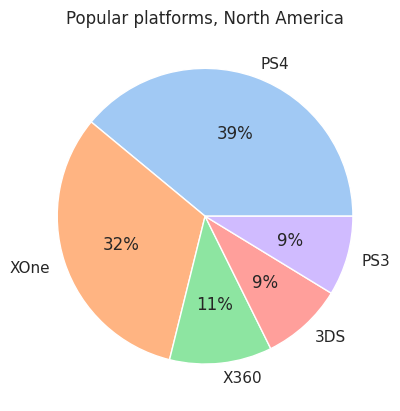

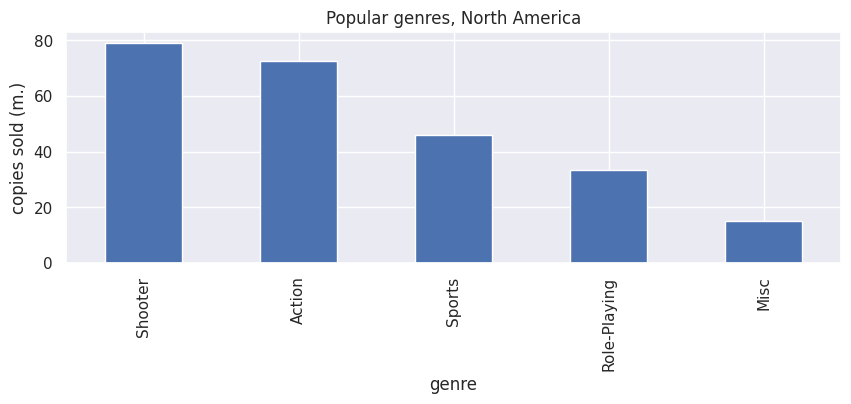

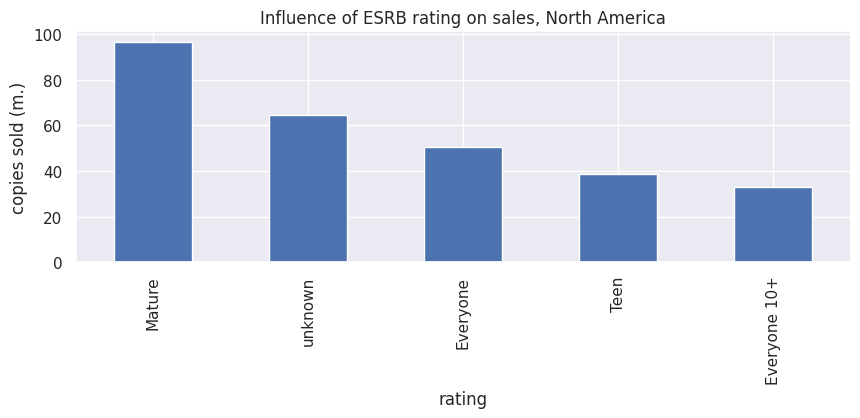

In [29]:
def regional_specifics(region):
  colors = sns.color_palette('pastel')[0:5]

  if region == 'NA':
    sales = 'na_sales'
    title = 'North America'
  elif region == 'EU':
    sales = 'eu_sales'
    title = 'Europe'
  else:
    sales = 'jp_sales'
    title = 'Japan'

  popular_pl = df_latest.groupby('platform')[sales].sum().sort_values(ascending=False).head(5)
  labels = list(popular_pl.keys())
  plt.title('Popular platforms, ' + title)
  plt.pie(popular_pl, labels = labels, colors = colors, autopct='%.0f%%')
  plt.show()

  popular_gr = df_latest.groupby('genre')[sales].sum().sort_values(ascending=False).head(5)
  popular_gr.plot(kind='bar', xlabel='genre', ylabel='copies sold (m.)', title='Popular genres, ' + title, figsize=(10, 3))
  plt.show()

  dict = {"M" : 'Mature', "E" : 'Everyone', "T": 'Teen', "E10+" : 'Everyone 10+'}
  popular_age = df_latest.replace({'rating': dict}).groupby('rating')[sales].sum().sort_values(ascending=False)
  popular_age.plot(kind='bar', xlabel='rating', ylabel='copies sold (m.)', title='Influence of ESRB rating on sales, ' + title, figsize=(10, 3))
  plt.show()

regional_specifics('NA')



For North America, the following characteristics are typical:

- The most popular platforms are PS4 and XOne.
- The most popular genres are Shooter and Action.
- The best-selling games are targeted at the Mature audience, with the second most numerous category being games without a specific rating.

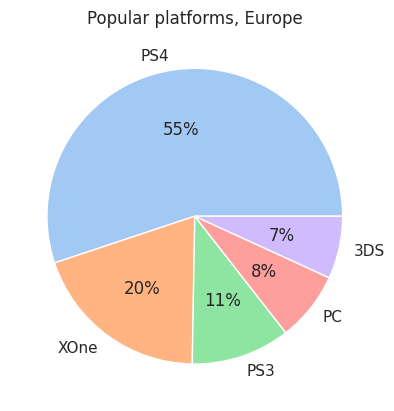

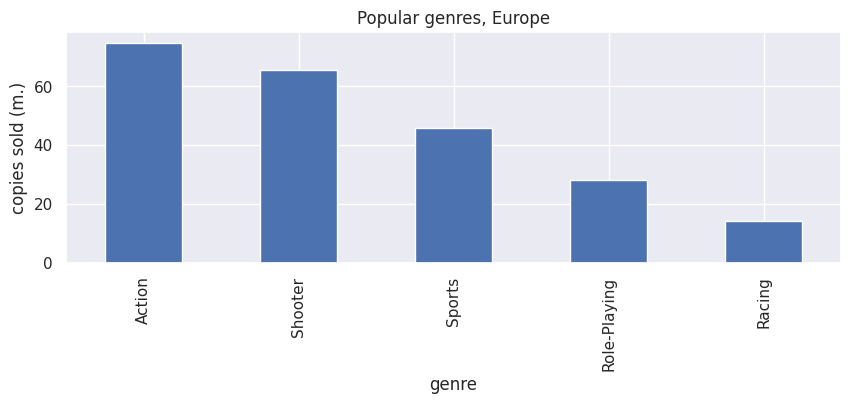

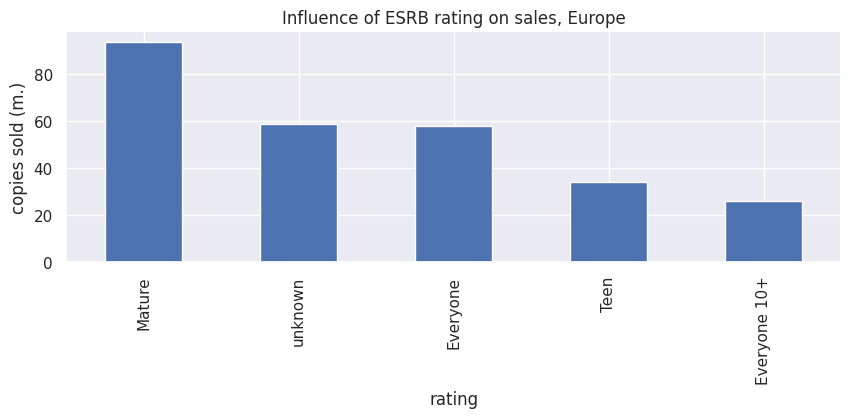

In [30]:
regional_specifics('EU')

In Europe:

- PS4 occupies the majority of the market for the most popular games (55%), followed by XOne (20%).
- The same genres are popular as in North America: Action and Shooter are at the top.
- The relationship between ESRB ratings and sales is similar: the Mature category is at the top.

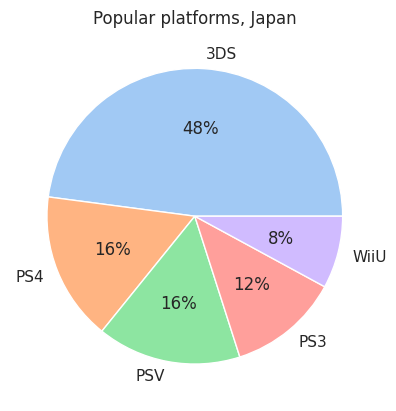

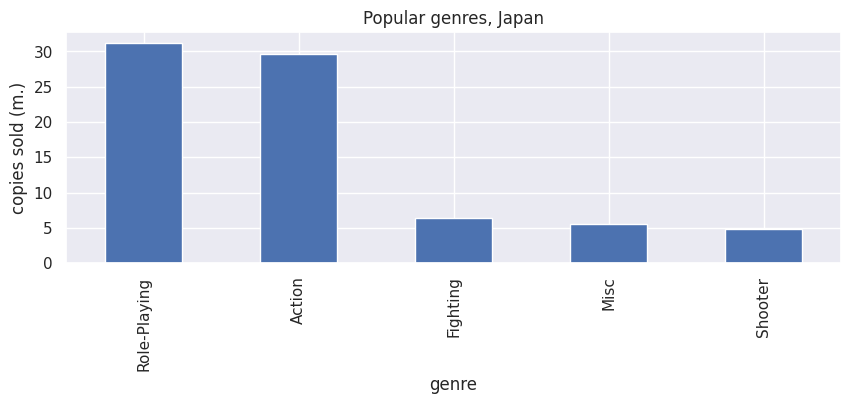

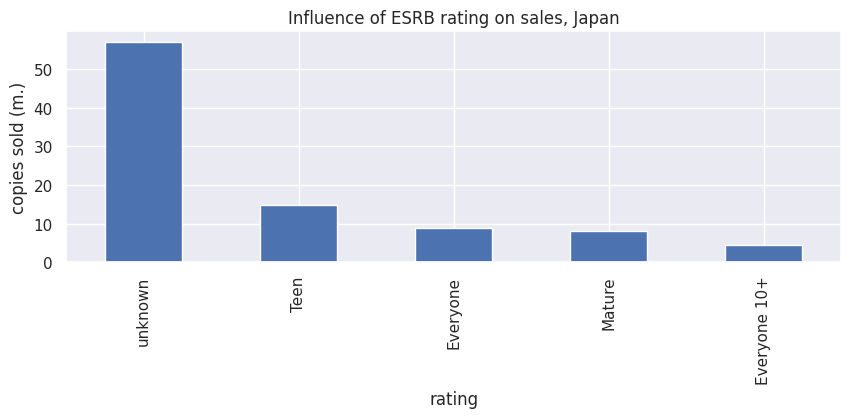

In [31]:
regional_specifics('JP')

The Japanese market is noticeably different:

- 3DS occupies almost half of the market, while PS4 has only 16% and XOne is not represented at all.
- The most popular genre is Role-Playing, followed by Action, and Shooter is the least popular.
- The largest category is games without a rating, followed by games with a Teen age rating.

### Conclusions for this section:
- In North America, the most popular genres are Shooter and Action games for the platforms PS4 and XOne, targeted at players aged 17 and above.
- In Europe, the most popular games are in the Action or Shooter genres for the PS4, targeting players aged 17 and above.
- In Japan, the most popular genres are Role-Playing and Action games, intended for the 3DS platform. Since the ESRB rating is specific to North America, we cannot determine the exact distribution of age categories in Japan. However, it can be assumed that the adult audience is the most numerous, as they are typically the most financially capable across regions.

## Hypothesis testing

### Hypothesis 1
**H0:** Xbox One and PC have similar average user scores.
<br>
**H1:** Xbox One and PC have different average user scores.

In [32]:
xbox_rating = df_latest.query('platform == "XOne"')['user_score'].dropna()
pc_rating = df_latest.query('platform == "PC"')['user_score'].dropna()

print(len(xbox_rating), len(pc_rating))

165 122


The samples are independent, so we will use the st.ttest_ind method. We also assume that the populations are similar in parameters, so we will leave the default value (True) for the equal_var parameter. Our samples are sufficiently large and similar in size, and both measure the same variable—there is no reason to believe that the variances will differ significantly.

In [33]:
alpha = .05

result = st.ttest_ind(xbox_rating, pc_rating)

print('p-value:', result.pvalue)

if (result.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("The null hypothesis was not rejected.")

p-value: 0.10450507919348415
The null hypothesis was not rejected.


Xbox One and PC have similar average user scores.



### Hypothesis 2

**H0:** Action and Sports genres have similar user scores.
<br>
**H1:** Action and Sports genres have different user scores.

In [34]:
action_rating = df_latest.query('genre == "Action"')['user_score'].dropna()
sports_rating = df_latest.query('genre == "Sports"')['user_score'].dropna()

print(len(action_rating), len(sports_rating))

297 127


We will follow the same logic as when testing the previous hypothesis: the samples are sufficiently large and independent, so we will use st.ttest_ind with equal_var=True.

In [35]:
alpha = .05

result = st.ttest_ind(action_rating, sports_rating)

print('p-value:', result.pvalue)

if (result.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("The null hypothesis was not rejected.")

p-value: 2.8711147985105864e-19
Rejecting the null hypothesis


Action and Sports genres have different user scores.

## General conclusions:
- The console video game market is rapidly declining. The number of games released in the period 2014-2015 was significantly lower than during the peak sales period (2008-2009). The number of game releases has remained around 500 games per year for several years.

- The life cycle of a platform is about 6.5 years, but the most popular platforms were on the market for about 10 years.

- The top-selling consoles in recent years are PS4, XOne, and 3DS. Sales of the Wii, PS3, X360, and PSV series are insignificant. PC ranks fourth in sales in 2016.

- In general, the number of copies sold for a game does not exceed 0.2 million, slightly higher for XOne games. However, most platforms have individual games that sold significantly better than others, for example, the PS4 has games with sales of 12 and 15 million copies.

- When forecasting sales, it is advisable to rely on critic reviews: the higher the scores, the higher the sales. However, it should be noted that half of the games represented in the dataset do not have critic reviews. It is worth mentioning that 40% of games lack user ratings - it is likely that there is a correlation between user ratings and sales, but there is not enough data to study it.

- In 2014-2016, the most games were released in the Action genre. It is followed by RPG, Adventure, Sports, and Shooter genres.

- At the same time, the Adventure genre has some of the lowest sales. The best-selling genres are Shooter, Sports, Platform, Fighting, and RPG.

- There are significant differences between the main regional markets. In North America and Europe, games intended for mature audiences (17+) in the Shooter and Action genres are the most popular. PS4 is the most popular platform in Europe, while in the USA, PS4 shares the first place with XOne. In Japan, games are mainly purchased in the Role-Playing or Action genres intended for 3DS. The target age could not be determined as ESRB operates only in North America.

- The hypothesis that the average user ratings of the Xbox One and PC platforms do not differ was tested and confirmed.

- The hypothesis that the average user ratings of the Action and Sports genres do not differ was not confirmed.

**Recommendations:**

- Focus on potentially profitable platforms - PS4 and XOne, as well as 3DS for the Japanese market.
- Take critic reviews into account when forecasting game sales.
- Emphasize games in the Shooter, Action, Sports, Platform, Fighting, and RPG genres, and consider Adventure, Puzzle, and Strategy genres less important.
- On the Japanese market, the most popular genre is Role-Playing.